## **Fatimah binti Mohd Nizam**
**Data science Assessment**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error


## Objective

1. To analyze the IT sales Performance throughout the year.

2. To predict the CustomerOrder feature by using supervised machine learning algorithms.

3. To analyze which Companies has the highest purchase of product from the IT department.

4. To analyze which products are among the highest purchased product from the IT
 department.

5. To observe the rate of increment for both NetLineDollarPrice and NetOrderDollar Price features.


### 1. Data Understanding

In [ ]:
#Read the csv file
df = pd.read_csv('Sales Data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (38,46) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
#Observe the dataset
df

,PurchaseOrderDate,PurchaseOrderNo,PurchasingAgent,ProductLineCode,ProductLineDescription,ProductLines,ProductNumber,NetLineDollarPrice,NetOrderDollarPrice,OrderedQuantity,TeleWebAgentID,SalesRep,WebOrderNo,CatalogID,CatalogName,InvoiceDate,InvoiceNo,InvoiceStatus,InvoiceToAddr,Status,CustomerName,TeleWebAgentName,BusinessUnit,SAPSalesOrderNoMfgSO,ProductDescription,EAD,SoldToAttentionEmail,SoldToAttentionPhone,SoldToAddr,NetInvoiceLineDollarPrice,xypOrderNo,ShipToAddr1,ShipToAddr2,ShipToAddr3,ShipToAddr4,ShipToAddr5,PaymentMethod,PaymentMethodDescription,PaymentReceiveDate,PaymentTerms,PaymentTermsDescription,CustomerOrder,xypCustomerNumber,VendorName,VendorPOMfgSO,NetOptionDollarPrice,ShipDate
0,15/5/2017,PO 94464,CSC,9R,PC Configuration Services,7F 8W 9F 9R AN BO MP,ZG229AV,0.0,0.00,1,NaN,GRACE.HUI.PING.SOO@companyx.com,SCPO757686,NaN,NaN,14/3/2018,68FI108034,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,Shawne Kee,PPS,70661890,LOC W10P6 A/P,NaN,NaN,906 284 1518,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",NaN,686M61890706,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,"Lot 1, Batu Berendam","Free Trade Zone III,",75350 BATU BERENDAM,Wire,Wire,NaN,DCIA,Cash in Advance,N,680099502.0,Inventec CQ,NaN,179.06,NaN
1,15/5/2017,PO 94464,CSC,9R,PC Configuration Services,7F 8W 9F 9R AN BO MP,ZG229AV,0.0,0.00,1,NaN,GRACE.HUI.PING.SOO@companyx.com,SCPO757686,NaN,NaN,14/3/2018,68FI108034,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,Shawne Kee,PPS,70661890,LOC W10P6 A/P,NaN,NaN,906 284 1518,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",NaN,686M61890706,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,"Lot 1, Batu Berendam","Free Trade Zone III,",75350 BATU BERENDAM,Wire,Wire,NaN,DCIA,Cash in Advance,N,680099502.0,Inventec CQ,NaN,-35.52,NaN
2,5/1/2018,JV2017/000058,CSC,8J,Detachables,8J 8N 8W MG,Z9Y75AV,0.0,0.00,6,yeon-yee.ooi@companyx.com,YEON-YEE.OOI@companyx.com,SCPO825227,CAT-719677,NaN,14/3/2018,68FI108034,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,Shawne Kee,PPS,70661890,LOC W10P6 A/P,NaN,NaN,906 284 1518,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",NaN,686M61890706,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,"Lot 1, Batu Berendam","Free Trade Zone III,",75350 BATU BERENDAM,Wire,Wire,NaN,DCIA,Cash in Advance,N,680099502.0,Inventec CQ,NaN,0.00,NaN
3,5/1/2018,JV2017/000058,CSC,8J,Detachables,8J 8N 8W MG,Z9Y75AV,0.0,0.00,6,yeon-yee.ooi@companyx.com,YEON-YEE.OOI@companyx.com,SCPO825227,CAT-719677,NaN,14/3/2018,68FI108034,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,Shawne Kee,PPS,70661890,Integrated HD 720p DM Webcam,NaN,NaN,906 284 1518,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",NaN,686M61890706,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,"Lot 1, Batu Berendam","Free Trade Zone III,",75350 BATU BERENDAM,Wire,Wire,NaN,DCIA,Cash in Advance,N,680099502.0,Inventec CQ,NaN,5.98,NaN
4,5/1/2018,JV2017/000058,CSC,8J,Detachables,8J 8N MG,Z9Y75AV,0.0,6585.37,6,NaN,YEON-YEE.OOI@companyx.com,SCPO825227,NaN,NaN,14/3/2018,68FI108034,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,Shawne Kee,PPS,70661890,Integrated HD 720p DM Webcam,NaN,NaN,906 284 1518,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",NaN,686M61890706,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,"Lot 1, Batu Berendam","Free Trade Zone III,",75350 BATU BERENDAM,Wire,Wire,NaN,DCIA,Cash in Advance,N,680099502.0,Inventec CQ,NaN,-1.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59373,22/8/2017,SG 1084,CSC,GA,Commercial Desktops L10 Value,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,NaN,GRACE.HUI.PING.SOO@companyx.com,SCPO786084,NaN,NaN,6/6/2017,75FI478721,FI,Ke-Heam PexypQ Engineering Pte Ltd18 Enterpris...,Shipped,Ke-Heam Peh,Chun Way Lee,PPS,317318751,McAfee Internet Security E Card,31/5/2017,NaN,9

In [ ]:
#to see on how many features and observations in the dataset
df.shape

(59378, 47)

In [ ]:
# count how many data available
df.count()

PurchaseOrderDate            59378
PurchaseOrderNo              59378
PurchasingAgent              58560
ProductLineCode              58560
ProductLineDescription       58520
ProductLines                 59378
ProductNumber                59378
NetLineDollarPrice           59378
NetOrderDollarPrice          59378
OrderedQuantity              59378
TeleWebAgentID               52180
SalesRep                     59378
WebOrderNo                   59378
CatalogID                    51908
CatalogName                    390
InvoiceDate                  48420
InvoiceNo                    48420
InvoiceStatus                59378
InvoiceToAddr                59378
Status                       59378
CustomerName                 59378
TeleWebAgentName             51796
BusinessUnit                 58520
SAPSalesOrderNoMfgSO         58988
ProductDescription           59368
EAD                          47064
SoldToAttentionEmail           250
SoldToAttentionPhone         58798
SoldToAddr          

In [ ]:
# To get more information regarding the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59378 entries, 0 to 59377
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PurchaseOrderDate          59378 non-null  object 
 1   PurchaseOrderNo            59378 non-null  object 
 2   PurchasingAgent            58560 non-null  object 
 3   ProductLineCode            58560 non-null  object 
 4   ProductLineDescription     58520 non-null  object 
 5   ProductLines               59378 non-null  object 
 6   ProductNumber              59378 non-null  object 
 7   NetLineDollarPrice         59378 non-null  float64
 8   NetOrderDollarPrice        59378 non-null  float64
 9   OrderedQuantity            59378 non-null  int64  
 10  TeleWebAgentID             52180 non-null  object 
 11  SalesRep                   59378 non-null  object 
 12  WebOrderNo                 59378 non-null  object 
 13  CatalogID                  51908 non-null  obj

## 2. Data Cleansing

In [ ]:
# to check how many missing values in the feature
df.isnull().sum()

PurchaseOrderDate                0
PurchaseOrderNo                  0
PurchasingAgent                818
ProductLineCode                818
ProductLineDescription         858
ProductLines                     0
ProductNumber                    0
NetLineDollarPrice               0
NetOrderDollarPrice              0
OrderedQuantity                  0
TeleWebAgentID                7198
SalesRep                         0
WebOrderNo                       0
CatalogID                     7470
CatalogName                  58988
InvoiceDate                  10958
InvoiceNo                    10958
InvoiceStatus                    0
InvoiceToAddr                    0
Status                           0
CustomerName                     0
TeleWebAgentName              7582
BusinessUnit                   858
SAPSalesOrderNoMfgSO           390
ProductDescription              10
EAD                          12314
SoldToAttentionEmail         59128
SoldToAttentionPhone           580
SoldToAddr          

In [ ]:
## Percentage of NAN values
df.isnull().mean()

PurchaseOrderDate            0.000000
PurchaseOrderNo              0.000000
PurchasingAgent              0.013776
ProductLineCode              0.013776
ProductLineDescription       0.014450
ProductLines                 0.000000
ProductNumber                0.000000
NetLineDollarPrice           0.000000
NetOrderDollarPrice          0.000000
OrderedQuantity              0.000000
TeleWebAgentID               0.121223
SalesRep                     0.000000
WebOrderNo                   0.000000
CatalogID                    0.125804
CatalogName                  0.993432
InvoiceDate                  0.184546
InvoiceNo                    0.184546
InvoiceStatus                0.000000
InvoiceToAddr                0.000000
Status                       0.000000
CustomerName                 0.000000
TeleWebAgentName             0.127690
BusinessUnit                 0.014450
SAPSalesOrderNoMfgSO         0.006568
ProductDescription           0.000168
EAD                          0.207383
SoldToAttent

It is possible to delete the missing values columns in the dataset because:

1. it is not affecting the result due to the large number of difference between the missing values and the available values.

2. From the data above the percentage of the missing values are not high except for PaymentReceivedDate, SoldToAttentionEmail, CatalogName, VendorPOMfgSO, NetInvoiceLineDollarPrice and ShipDate .

3. However, all of the columns mentioned in 2 are not neccesary for the objectives of this analysis.

In [ ]:
#Dropping the columns that have missing values
new_df = df.dropna(axis='columns')

In [ ]:
# Observe the new dataset
new_df

,PurchaseOrderDate,PurchaseOrderNo,ProductLines,ProductNumber,NetLineDollarPrice,NetOrderDollarPrice,OrderedQuantity,SalesRep,WebOrderNo,InvoiceStatus,InvoiceToAddr,Status,CustomerName,xypOrderNo,ShipToAddr2,ShipToAddr5,CustomerOrder
0,15/5/2017,PO 94464,7F 8W 9F 9R AN BO MP,ZG229AV,0.0,0.00,1,GRACE.HUI.PING.SOO@companyx.com,SCPO757686,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
1,15/5/2017,PO 94464,7F 8W 9F 9R AN BO MP,ZG229AV,0.0,0.00,1,GRACE.HUI.PING.SOO@companyx.com,SCPO757686,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
2,5/1/2018,JV2017/000058,8J 8N 8W MG,Z9Y75AV,0.0,0.00,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
3,5/1/2018,JV2017/000058,8J 8N 8W MG,Z9Y75AV,0.0,0.00,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
4,5/1/2018,JV2017/000058,8J 8N MG,Z9Y75AV,0.0,6585.37,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59373,22/8/2017,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,GRACE.HUI.PING.SOO@companyx.com,SCPO786084,FI,Ke-Heam PexypQ Engineering Pte Ltd18 Enterpris...,Shipped,Ke-Heam Peh,758S18751373,PQ Engineering Pte Ltd,629824 SINGAPORE,Y
59374,22/8/2017,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,0.00,2,GRACE.HUI.PING.SOO@companyx.com,SCPO786084,FI,Ke-Heam PexypQ Engineering Pte Ltd18 Enterpris...,Shipped,Ke-Heam Peh,758S18751373,PQ Engineering Pte Ltd,629824 SINGAPORE,Y
59375,22/8/2017,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,GRACE.HUI.PING.SOO@companyx.com,SCPO786084,FI,Ke-Heam PexypQ Engineering Pte Ltd18 Enterpris...,Shipped,Ke-Heam Peh,758S18751373,PQ Engineering Pte Ltd,629824 SINGAPORE,Y
59376,22/8/2017,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,GRACE.HUI.PING.SOO@companyx.com,SCPO786084,FI,Ke-Heam PexypQ Engineering Pte Ltd18 Enterpris...,Shipped,Ke-Heam Peh,758S18751373,PQ Engineering Pte Ltd,629824 SINGAPORE,Y


In [ ]:
# to check how many missing values in the feature
new_df.isnull().sum()

PurchaseOrderDate      0
PurchaseOrderNo        0
ProductLines           0
ProductNumber          0
NetLineDollarPrice     0
NetOrderDollarPrice    0
OrderedQuantity        0
SalesRep               0
WebOrderNo             0
InvoiceStatus          0
InvoiceToAddr          0
Status                 0
CustomerName           0
xypOrderNo             0
ShipToAddr2            0
ShipToAddr5            0
CustomerOrder          0
dtype: int64

In [ ]:
# To have a clearer observation of the dataset
new_df.head(10)

,PurchaseOrderDate,PurchaseOrderNo,ProductLines,ProductNumber,NetLineDollarPrice,NetOrderDollarPrice,OrderedQuantity,SalesRep,WebOrderNo,InvoiceStatus,InvoiceToAddr,Status,CustomerName,xypOrderNo,ShipToAddr2,ShipToAddr5,CustomerOrder
0,15/5/2017,PO 94464,7F 8W 9F 9R AN BO MP,ZG229AV,0.00,0.00,1,GRACE.HUI.PING.SOO@companyx.com,SCPO757686,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
1,15/5/2017,PO 94464,7F 8W 9F 9R AN BO MP,ZG229AV,0.00,0.00,1,GRACE.HUI.PING.SOO@companyx.com,SCPO757686,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
2,5/1/2018,JV2017/000058,8J 8N 8W MG,Z9Y75AV,0.00,0.00,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
3,5/1/2018,JV2017/000058,8J 8N 8W MG,Z9Y75AV,0.00,0.00,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
4,5/1/2018,JV2017/000058,8J 8N MG,Z9Y75AV,0.00,6585.37,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
5,5/1/2018,JV2017/000058,8J 8N MG,Z9Y75AV,0.00,6585.37,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
6,5/1/2018,JV2017/000058,8J 8N MG,Z9Y75AV,0.00,6585.37,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
7,5/1/2018,JV2017/000058,8J 8N MG,Z9Y75AV,0.00,6585.37,6,YEON-YEE.OOI@companyx.com,SCPO825227,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
8,10/4/2017,SCPO748376,8J 8W FF,Z9R42AA#UUF,135.35,1359.33,1,GRACE.HUI.PING.SOO@companyx.com,SCPO748376,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N
9,10/4/2017,SCPO748376,8J 8W FF,Z9R42AA#UUF,135.35,1359.33,1,GRACE.HUI.PING.SOO@companyx.com,SCPO748376,FI,"Hon Mun NgMaxell Tohshin (M) Sdn Bhd Lot 1, Ba...",Processing,Hon Mun Ng,686M61890706,Maxell Tohshin (M) Sdn Bhd,75350 BATU BERENDAM,N


In [ ]:
# To view the rows and columns of the dataset
new_df.shape

(59378, 17)

From 44 features, only 17 features are selected after the data cleasing.

## 3. Data Aggregation and Data Deduplication

- Data aggregation is the process of gathering the data and represent it in a summarized way.

- Data deduplication is a technique for eliminating duplicate copies of repeating data.

To evaluate whether that the ProductLines, ProductNumber and PurchaseOrderNo features are having the same information

In [ ]:
# To see on how much unique values allocated in ProductLines feature
productline = new_df['ProductLines'].unique()
productline

array(['7F 8W 9F 9R AN BO MP', '8J 8N 8W MG', '8J 8N MG', '8J 8W FF',
       '8W MP TA', '8W 9F', '8W AN FF MG MP', '5X 8W AN FF MG MP',
       '5U 7F 8W BO', '5U 7F 8W', '8W 9G DG', '5U 7F 8W MG', '{}',
       '9G GA', '8W AN MG MP TA', '1M 2G 8W', '1M 2Q 8W',
       '1M 2G 8W 9G MP', '1M 5U BO', '1M', '1M 8W', '1M 8W MP',
       '1M 8W 9G KV', '1M 2N 8W 9G AU', '1M 2N 8W KV', '2G 8W',
       '16 5U 7F 8W BO', '5U 7F 8W BO MG', '5X 8W 9H', '8W 9G KV',
       '8W DG MG', '2G 8W DG', '8W BO DG MG', '5U 7F 8W 9F BO',
       '5U 7F 9F BO', '7F 8W 9R', '16 7F 9G BO MG', '7F 8W AN MG MP',
       '7F AN MG MP', '7F 8W', '7F 8W BO GA MP', '7F 8W 9G', '7F 8W BO',
       '7F 8W 9G BO', '7F 8W 9G BO MG', '7F 8W BO MG', '7F', '7F 8W MG',
       '7F 8W TB', '6U 8W MG MP', '5U 8W MP', '8W AN MG MP', 'AN',
       '16 7F 8W 9R', '16 7F 9R', '8W 9G KV MN MP', '2N 8W',
       '2N 4H 9G DU FF KV', '1M 2N 4H 9G DU FF KV', '2N AU',
       '2N 8W 9G AU KV MP', '2N 8W AU', '2N 5M 8W AU', '5X 8W',
       '8W

In [ ]:
productline.shape

(192,)

In [ ]:
# To see on how much unique values allocated in ProductNumber feature
ProductNumber = new_df['ProductNumber'].unique()
ProductNumber

array(['ZG229AV', 'Z9Y75AV', 'Z9R42AA#UUF', ..., '1AB35AV', '1AB34AV',
       '1AB33AV'], dtype=object)

In [ ]:
ProductNumber.shape

(1900,)

In [ ]:
# To see on how much unique values allocated in PurchaseOrderNo feature
PurchaseOrderNo = new_df['PurchaseOrderNo'].unique()
PurchaseOrderNo


array(['PO 94464', 'JV2017/000058', 'SCPO748376', 'SCPO820594',
       'SCPO876647', '2017-11-114126', 'SCPO786091', 'SCPO755717',
       'SCPO760227', 'SCPO755719', 'FRONTPOS/SIMPANGEMPAT',
       'MY20180416-Muar', 'TGFADMGPCxyp2190318', 'MY20180416-BtGajah',
       'BACKEND/SIMPANGEMPAT', 'PO5009844', 'PO500983', '1803-020',
       'SCPO808462', 'PA58496ATM', 'SCPO876621', 'LF35108ATM',
       'SCPO847081', 'SCPO874275', 'SCPO874264', '4500834183',
       'SCPO834216', 'SCPO855537', 'SCPO757551', 'SCPO851835',
       'SCPO854230', 'SCPO854263', 'SCPO854259', 'SCPO854226',
       'SCPO854258', 'SCPO768509', 'SCPO756975', 'SCPO761712',
       'SCPO764661', 'PO1707-0050', 'SCPO766012', 'SCPO827436',
       'SCPO820959', 'SCPO835682', 'SCPO818061', 'SCPO837307',
       'SAPO18063049', 'SCPO870225', 'SCPO757024', 'PO98393',
       'SCPO857586', 'SCPO870974', 'SCPO867246', 'SCPO808929', 'POC18814',
       'SCPO870973', 'SCPO809615', 'SCPO871288', 'FMM/FA/1718/014',
       'C18842', 'SRO/F

In [ ]:
PurchaseOrderNo.shape

(845,)

From the result above,we could not conclude that ProductLine, ProductNumber and PurchaseOrderNo are carrying the same information.

We will like to verify that PurchaseOrderNo has the same information as CustomerOrder and CustomerName.

In [ ]:
customerOrder = new_df['CustomerOrder'].unique()
customerOrder

array(['N', 'Y'], dtype=object)

In [ ]:
CustomerName = new_df['CustomerName'].unique()
CustomerName.shape

(409,)

They are not carrying the same information based on the unique result that we obtained.

We can start by eliminating the features that represent the unnecessary features in the dataset according to the objectives.


In [ ]:
# remove the features that are not related to the objectives
sales = new_df.drop(['InvoiceStatus', 'InvoiceToAddr', 'ShipToAddr5','SalesRep', 'Status', 'xypOrderNo'], axis = 1) 
sales

,PurchaseOrderDate,PurchaseOrderNo,ProductLines,ProductNumber,NetLineDollarPrice,NetOrderDollarPrice,OrderedQuantity,WebOrderNo,CustomerName,ShipToAddr2,CustomerOrder
0,15/5/2017,PO 94464,7F 8W 9F 9R AN BO MP,ZG229AV,0.0,0.00,1,SCPO757686,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
1,15/5/2017,PO 94464,7F 8W 9F 9R AN BO MP,ZG229AV,0.0,0.00,1,SCPO757686,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
2,5/1/2018,JV2017/000058,8J 8N 8W MG,Z9Y75AV,0.0,0.00,6,SCPO825227,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
3,5/1/2018,JV2017/000058,8J 8N 8W MG,Z9Y75AV,0.0,0.00,6,SCPO825227,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
4,5/1/2018,JV2017/000058,8J 8N MG,Z9Y75AV,0.0,6585.37,6,SCPO825227,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
...,...,...,...,...,...,...,...,...,...,...,...
59373,22/8/2017,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,SCPO786084,Ke-Heam Peh,PQ Engineering Pte Ltd,Y
59374,22/8/2017,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,0.00,2,SCPO786084,Ke-Heam Peh,PQ Engineering Pte Ltd,Y
59375,22/8/2017,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,SCPO786084,Ke-Heam Peh,PQ Engineering Pte Ltd,Y
59376,22/8/2017,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,SCPO786084,Ke-Heam Peh,PQ Engineering Pte Ltd,Y


In [ ]:
sales.shape

(59378, 11)

## 4. Data Transformation

Data Transformation is the process of converting data from one format to another.

In [ ]:
#Converting the PurchaseOrderDate to DataTime format

sales["PurchaseOrderDate"] = pd.to_datetime(sales["PurchaseOrderDate"])
sales

,PurchaseOrderDate,PurchaseOrderNo,ProductLines,ProductNumber,NetLineDollarPrice,NetOrderDollarPrice,OrderedQuantity,WebOrderNo,CustomerName,ShipToAddr2,CustomerOrder
0,2017-05-15,PO 94464,7F 8W 9F 9R AN BO MP,ZG229AV,0.0,0.00,1,SCPO757686,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
1,2017-05-15,PO 94464,7F 8W 9F 9R AN BO MP,ZG229AV,0.0,0.00,1,SCPO757686,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
2,2018-05-01,JV2017/000058,8J 8N 8W MG,Z9Y75AV,0.0,0.00,6,SCPO825227,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
3,2018-05-01,JV2017/000058,8J 8N 8W MG,Z9Y75AV,0.0,0.00,6,SCPO825227,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
4,2018-05-01,JV2017/000058,8J 8N MG,Z9Y75AV,0.0,6585.37,6,SCPO825227,Hon Mun Ng,Maxell Tohshin (M) Sdn Bhd,N
...,...,...,...,...,...,...,...,...,...,...,...
59373,2017-08-22,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,SCPO786084,Ke-Heam Peh,PQ Engineering Pte Ltd,Y
59374,2017-08-22,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,0.00,2,SCPO786084,Ke-Heam Peh,PQ Engineering Pte Ltd,Y
59375,2017-08-22,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,SCPO786084,Ke-Heam Peh,PQ Engineering Pte Ltd,Y
59376,2017-08-22,SG 1084,7F 8W BO GA MP,1AB33AV,0.0,2957.14,2,SCPO786084,Ke-Heam Peh,PQ Engineering Pte Ltd,Y


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59378 entries, 0 to 59377
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PurchaseOrderDate    59378 non-null  datetime64[ns]
 1   PurchaseOrderNo      59378 non-null  object        
 2   ProductLines         59378 non-null  object        
 3   ProductNumber        59378 non-null  object        
 4   NetLineDollarPrice   59378 non-null  float64       
 5   NetOrderDollarPrice  59378 non-null  float64       
 6   OrderedQuantity      59378 non-null  int64         
 7   WebOrderNo           59378 non-null  object        
 8   CustomerName         59378 non-null  object        
 9   ShipToAddr2          59378 non-null  object        
 10  CustomerOrder        59378 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 5.0+ MB


## 5. Exploratory Data Analysis (EDA)

EDA involves with the process of getting insights from the dataset and perform descriptive statistics.

In [ ]:
sales.describe()

,NetLineDollarPrice,NetOrderDollarPrice,OrderedQuantity
count,59378.000000,59378.000000,59378.000000
mean,167.960680,2601.289978,4.425107
std,1778.386717,10090.008458,10.974984
min,-78138.000000,-78926.950000,1.000000
25%,0.000000,213.270000,1.000000
50%,0.000000,1022.590000,1.000000
75%,0.000000,2512.480000,3.000000
max,78138.000000,78926.950000,600.000000


We can observe from the above table that:



*   The maximum dollar price from the order net profit is around 78,927 dollars and the maximum dollar price from the product net profit is around 78, 138 dollars. To conclude, order net profit has a higher amount than the net profit obtained from the Line.

*   The highest amount of ordered quantity would be 600 items.



#### i. Continuous Variable Distribution

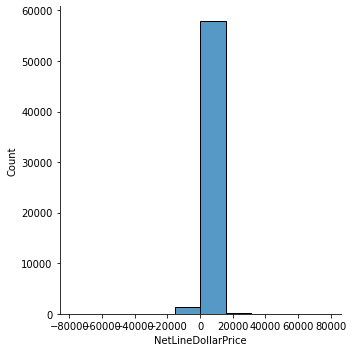

In [ ]:
 sns.displot(sales, x="NetLineDollarPrice", bins=10)

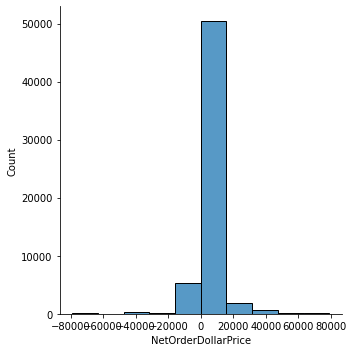

In [ ]:
 sns.displot(sales, x="NetOrderDollarPrice", bins=10)

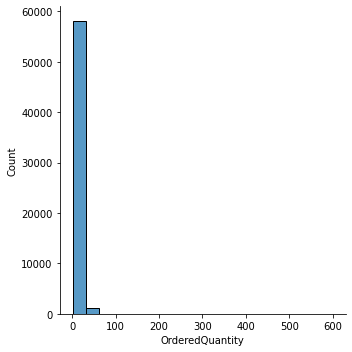

In [ ]:
sns.displot(sales, x="OrderedQuantity", bins=20)

#### ii. Datewise Analysis 

Datewise analysis is used to analyze the trends of NetLineDollarPrice, NetOrderDollarPrice and OrderedQuantity according to time.

In [ ]:
# Summation of the continuous variables inside the latest dataset
# A new variable called datawise stores the data regarding the continous variables based on the purchase date
datewise=sales.groupby(["PurchaseOrderDate"]).agg({"NetLineDollarPrice":'sum', "NetOrderDollarPrice":'sum', "OrderedQuantity":'sum'})
datewise

,NetLineDollarPrice,NetOrderDollarPrice,OrderedQuantity
PurchaseOrderDate,,,
2017-01-11,17269.02,246944.44,300
2017-02-05,399351.66,599379.22,1228
2017-02-06,20275.82,46776.18,68
2017-02-11,59290.18,941287.16,1418
2017-03-05,4526.70,16491.62,26
...,...,...,...
2018-12-01,86156.30,1427557.68,5414
2018-12-02,8819.16,313080.18,304
2018-12-03,-5180.30,-122037.14,124


**Trend of NetLineDollarPrice**

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["NetLineDollarPrice"], 
                         mode='lines+markers', name='NetLineDollarPrice'))
fig.update_layout(title="The trend of NetLineDollarPrice",
                 xaxis_title="Date", yaxis_title="NetLineDollarPrice")
fig.show()

From the graph plotted above, we can see that: 

*   the highest net profit obtained from Line (productLine) are 486.73K on 14th of December 2017. 

*   The NetLineDollarPrice does not have a clear trend. 

*   The trend also does not prove that the profits obtained are based on seasons. 

*   The profit might only spikes due to the a sudden demand from the customers when it is neccesary for their companies.



**Trend of NetOrderDollarPrice**

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=datewise.index, y=datewise["NetOrderDollarPrice"], 
                         mode='lines+markers', name='NetOrderDollarPrice'))
fig1.update_layout(title="The trend of NetOrderDollarPrice",
                 xaxis_title="Date", yaxis_title="NetOrderDollarPrice")
fig1.show()

From the graph we can observe that:



*   The highest net profit obtained by orders are 8,303K dollars on 21st June 2018.

*   The NetOrderDollarPrice also does not have a clear trend.
*   However, the IT sales department almost make a constant net profit from 6th December 2017 to 21st December 2017 and also from 5th April 2018 to 27th April 2018.





**Trend of OrderedQuantity**

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=datewise.index, y=datewise["OrderedQuantity"], 
                         mode='lines+markers', name='OrderedQuantity'))
fig1.update_layout(title="The trend of OrderedQuantity",
                 xaxis_title="Date", yaxis_title="OrderedQuantity")
fig1.show()

From the graph above, we can observe that:



*   The highest order quantity received by the IT Sales department will be 28,682 orders on 12th December 2017. That was 2 days before the the second highest net profit obtained on 14th December 2017. That period will be a success of cash deposits from the IT Sales department.

*   However, 21st Jun 2018 was the highest date receiving net profit from the order. We can assume that there might be some late payments occurred. 


#### To make a comparison between the NetLineDollarPrice and NetOrderDollarPrice

In [ ]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=datewise.index, y=datewise["NetLineDollarPrice"], 
                         mode='lines+markers', name='NetLineDollarPrice'))
fig2.add_trace(go.Scatter(x=datewise.index, y=datewise["NetOrderDollarPrice"], 
                         mode='lines+markers', name='NetOrderDollarPrice'))
fig2.update_layout(title="The trend of NetlineOrderDollarPrice and NetOrderDollarPrice",
                 xaxis_title="Date", yaxis_title="NetLineOrderPrice and NetOrderDollarPrice")
fig2.show()

From the graph above we definitely can conclude that the IT Sales department has gained for profit from the orders rather than from the product line services.

The rate of increment for both NetLineDollarPrice and NetOrderDollarPrice.

In [ ]:
datewise["NetLineDollarPrice Rate"] =(datewise["NetLineDollarPrice"])*100
datewise["NetOrderDollarPrice Rate"] = (datewise["NetOrderDollarPrice"])*100

print("The average NetLineDollarPrice Rate: ", datewise["NetLineDollarPrice Rate"].mean())
print("The average NetOrderDollarPrice Rate: ", datewise["NetOrderDollarPrice Rate"].mean())

The average NetLineDollarPrice Rate:  4298779.862068965
The average NetOrderDollarPrice Rate:  66577325.99137922


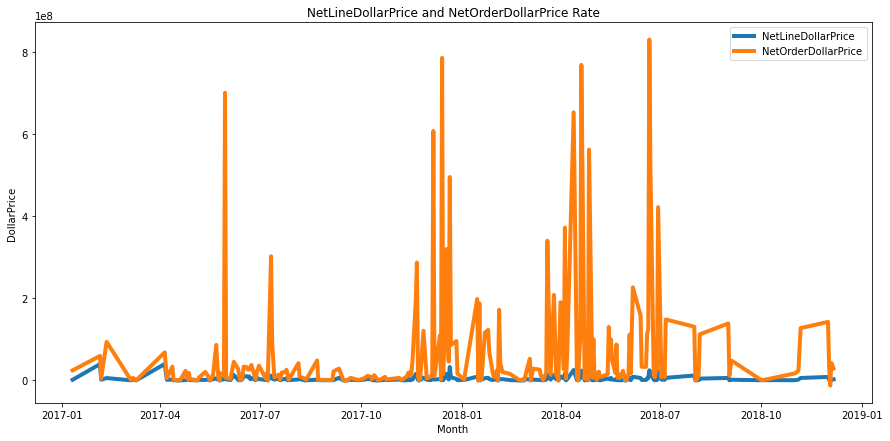

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(datewise.index,datewise["NetLineDollarPrice Rate"], linewidth=4)
plt.plot(datewise.index,datewise["NetOrderDollarPrice Rate"], linewidth=4)
plt.legend(['NetLineDollarPrice', 'NetOrderDollarPrice'])
plt.title('NetLineDollarPrice and NetOrderDollarPrice Rate')
plt.xlabel('Month')
plt.ylabel('DollarPrice')
plt.show()

From the graph above we can see that the rate of increment for NetOrderDollarPrice was on July 2018. 

#### iii. Categorical Variable Distribution

In [ ]:
Top_6Confirmed = sales.sort_values(["OrderedQuantity"], ascending=False).head(30)
CompaniesNames = sales["ShipToAddr2"]

Text(0.5, 1.0, 'Top 4 online purchase product')

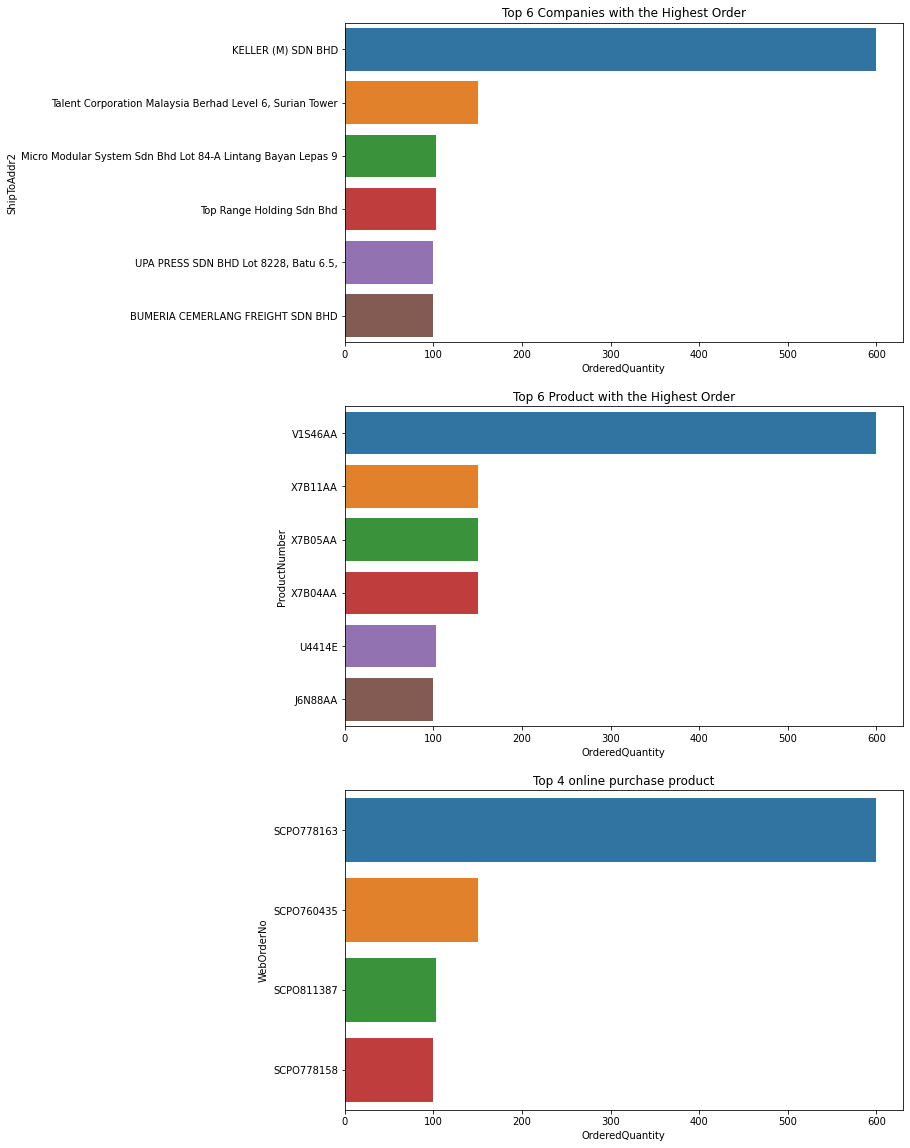

In [ ]:
#Horizontal bar
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_6Confirmed["OrderedQuantity"],y=Top_6Confirmed["ShipToAddr2"],ax=ax1)
ax1.set_title("Top 6 Companies with the Highest Order")
sns.barplot(x=Top_6Confirmed["OrderedQuantity"],y=Top_6Confirmed["ProductNumber"],ax=ax2)
ax2.set_title("Top 6 Product with the Highest Order")
sns.barplot(x=Top_6Confirmed["OrderedQuantity"],y=Top_6Confirmed["WebOrderNo"],ax=ax3)
ax3.set_title("Top 4 online purchase product")

From the horizontal Bar Chart above, we can observe that:



*   The top 6 Companies with the highest order throughout the record are Keller (M) Sdn Bhd, Talent Corporation Malaysia Berhad, Micro Modular System Sdn Bhd, Top Range Holding Sdn bhd, UPA PRESS Sdn Bhd and Bumeria Cemerlang Freight Sdn Bhd.

*   The top 6 products with the highest number of purchases are V1546AA, X7B11AA, X7B05AA, X7B04AA, U3314E and J6N88AA.

*   Top 4 Online Purchase Product made are SCP0778163, SCPo760760435, SCP0811387 and SCPO778158.



#### iv. Hypothesis Testing

From the dataset obtained, can we say that the net profit from orders are decreased in 2019?

We will create a null hypothesis and alternative hypothesis and determine whether to reject or accept the null hypothesis according to the p-value.



---



*   Null Hypothesis, Ho = The net profit from the orders are decreased in 2019.
*   Alternative Hypothesis, Ha = The net profit from the orders are increased in 2019.



In [ ]:
NetOrder  = sales.groupby(["PurchaseOrderDate"]).agg({"NetLineDollarPrice":'sum'})
NetOrder

,NetLineDollarPrice
PurchaseOrderDate,
2017-01-11,17269.02
2017-02-05,399351.66
2017-02-06,20275.82
2017-02-11,59290.18
2017-03-05,4526.70
...,...
2018-12-01,86156.30
2018-12-02,8819.16
2018-12-03,-5180.30


In [127]:
NetOrder['NetLineDollarPrice'].mean()

42987.79862068966

In this case the mean is known.

In [131]:
import statistics

statistics.stdev(NetOrder['NetLineDollarPrice'])

67565.38247864606

In [ ]:
sample_data = NetOrder.NetLineDollarPrice
sample_data[:5]

PurchaseOrderDate
2017-01-11     17269.02
2017-02-05    399351.66
2017-02-06     20275.82
2017-02-11     59290.18
2017-03-05      4526.70
Name: NetLineDollarPrice, dtype: float64

In [130]:
sample_data.shape

(232,)

In [137]:
from scipy.stats import norm 
# H0: mu = 42987
# Ha: mu < 42987

mu_0 = 42987
x_bar = 59378
n = 232
sigma = 67565
p_value =  norm.cdf(x_bar, mu_0, sigma)

alpha = .05


mu_0=42987
x_bar = np.mean(sample_data)
print('x_bar = ', x_bar)
s = np.std(sample_data, ddof=1)
print('s = ', s)
n = len(sample_data)
print('n = ', n)
t_score = (x_bar - mu_0)/(s/(n**.5))
print('t_score = ', t_score)
p_value = t.cdf(t_score, df = n-1)
print('p_value = ', p_value)
if p_value < alpha: 
    print("\np_value = {}, Reject the null hypothesis in favour of the alternative that the mean\
    of net profit for orders increased in 2019 comparing that in 2018 and 2017.".format(round(p_value, 3)))
else: 
    print("\np_value = {}, CANNOT Reject the null hypothesis. Therefore, there is not strong enough evidence that the net of profit for orders is higher in 2019 comparing that in 2017 and 2018.".format(round(p_value, 3)))


x_bar =  42987.79862068966
s =  67565.38247864608
n =  232
t_score =  0.00018003639576890496
p_value =  0.5000717464404413

p_value = 0.5, CANNOT Reject the null hypothesis. Therefore, there is not strong enough evidence that the net of profit for orders is higher in 2019 comparing that in 2017 and 2018.


- When the p-value is <0.05, we can reject the null hypothesis.
- When the p-value is >0.05, we cannot reject the null hypothesis.

Thus, there is a probability that the net of profits for Order could decrease in 2019.

## 6. Modelling : Supervised Learning

#### 6.1 Time Series: ARIMA Model

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

In [ ]:
# Regression for NetLineDollarPrice
datewise[['NetOrderDollarPrice']].shape


(232, 1)

In [ ]:
# split the dataset into train and test data
train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
!pip3 install pyramid-arima

In [ ]:
from pyramid.arima import auto_arima
model_arima= auto_arima(train["NetLineDollarPrice"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train["NetLineDollarPrice"])

Fit ARIMA: order=(1, 0, 1); AIC=5531.574, BIC=5545.148, Fit time=0.087 seconds
Fit ARIMA: order=(1, 0, 2); AIC=5531.741, BIC=5548.709, Fit time=0.163 seconds
Fit ARIMA: order=(1, 0, 3); AIC=5537.281, BIC=5557.642, Fit time=0.553 seconds
Fit ARIMA: order=(2, 0, 1); AIC=5531.997, BIC=5548.966, Fit time=0.152 seconds
Fit ARIMA: order=(2, 0, 2); AIC=5535.124, BIC=5555.486, Fit time=0.481 seconds
Fit ARIMA: order=(2, 0, 3); AIC=5530.519, BIC=5554.275, Fit time=0.632 seconds
Fit ARIMA: order=(3, 0, 1); AIC=5533.495, BIC=5553.857, Fit time=0.201 seconds
Fit ARIMA: order=(3, 0, 2); AIC=5530.324, BIC=5554.080, Fit time=0.328 seconds
Fit ARIMA: order=(3, 0, 3); AIC=5531.940, BIC=5559.089, Fit time=0.665 seconds
Total fit time: 3.268 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [ ]:

prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [ ]:
# visualization on the Train Data, validation Data and Prediction.

fig=go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train["NetLineDollarPrice"],
                    mode='lines+markers',name="Train Data for NetLineDollarPrice"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["NetLineDollarPrice"],
                    mode='lines+markers',name="Validation Data for NetLineDollarPrice",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for NetLineDollarPrice",))
fig.update_layout(title="NetLineDollarPrice ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="NetLineDollarPrice",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
r2_score(valid["NetLineDollarPrice"], prediction_arima)

-0.4524048442917401

*Note: $R^2$ can be negative in some situations. In particular, if no intercept was included in the fit, $R^2$ can become negative. In these cases, the learned model is worse than the null model.*

#### 6.2 Classification by using KNN

K-Nearest Neighbour is a supervised learning algorithm that stores all available cases and classfies new cased based on similarity measures (e.g. distance functions).

We are using the KNN classification to classify whether the purchase was Customer Order (Y) or no (N).

In [ ]:
X = sales[['NetOrderDollarPrice', 'NetLineDollarPrice', 'OrderedQuantity']]
y = sales['CustomerOrder']

In [ ]:
X.head()

,NetOrderDollarPrice,NetLineDollarPrice,OrderedQuantity
0,0.00,0.0,1
1,0.00,0.0,1
2,0.00,0.0,6
3,0.00,0.0,6
4,6585.37,0.0,6


In [ ]:
X.shape

(59378, 3)

In [ ]:
y.head()

0    N
1    N
2    N
3    N
4    N
Name: CustomerOrder, dtype: object

In [ ]:
y.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
#split the dataset into train data and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

E_knn = KNeighborsClassifier(n_neighbors=3, p=2)
E_knn.fit(X_train_s, y_train)
print('Accuracy for k = 3 & Euclidian on train set: {} \n'.format(E_knn.score(X_train_s, y_train)))
print('Accuracy for k = 3 & Euclidian on test data: {} \n'.format(E_knn.score(X_test_s, y_test)))

M_knn = KNeighborsClassifier(n_neighbors=3, p=1)
M_knn.fit(X_train_s, y_train)
print('Accuracy for k = 3 & Manhatan on train set: {} \n'.format(M_knn.score(X_train_s, y_train)))
print('Accuracy for k = 3 & Manhatan on test data: {} \n'.format(M_knn.score(X_test_s, y_test)))

Accuracy for k = 3 & Euclidian on train set: 0.7430634499600017 

Accuracy for k = 3 & Euclidian on test data: 0.7321488716739643 

Accuracy for k = 3 & Manhatan on train set: 0.7430845017051914 

Accuracy for k = 3 & Manhatan on test data: 0.7322330751094644 



Now we will try to test the prediction for using KNN with Euclidean distance.

In [ ]:
CustomerOrder_prediction = E_knn.predict([[2, 3.2, 5]])
print('Customer Order is '+CustomerOrder_prediction[0])

Customer Order is Y


Now we will try to test the prediction for using KNN with Manhattan distance.

In [ ]:
CustomerOrder_prediction = M_knn.predict([[2, 3.2, 5]])
print('Customer Order is '+CustomerOrder_prediction[0])

Customer Order is Y


Check the accuracy score for both KNN(Euclidean Distance) and KNN(Manhattan Distance)

In [ ]:
#accuracy
E_knn.score(X_test, y_test)

0.504546985517009

In [ ]:
knnmodel1 = E_knn.fit(X_train_s, y_train)
Euclidean = knnmodel1.predict(X_test)
Knn_acc= accuracy_score(y_test, Euclidean)
Knn_acc

0.504546985517009

In [ ]:
M_knn.score(X_test, y_test)

0.5067362748400135

In [ ]:
knnmodel1 = M_knn.fit(X_train_s, y_train)
Manhattan = knnmodel1.predict(X_test)
Knn_acc= accuracy_score(y_test, Manhattan)
Knn_acc

0.5067362748400135

#### 6.3 Classification using Decision trees

Classification tree is a method of splitting the dataset into multiple sets until a decision is made. We will also used classification tree to determine whether CustomerOrder is a Yes (Y) or No(N).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.806


In [ ]:
tree.score(X_test,y_test)

0.8059952846076119

In [ ]:
rfc_Count = tree.predict(X_test)
accuracy_score(y_test, rfc_Count)

0.8059952846076119

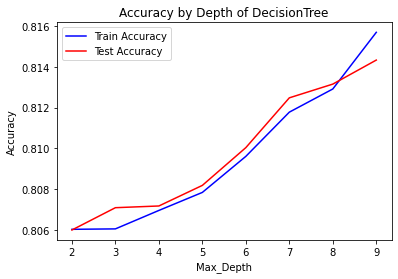

In [ ]:
train_acc = []
test_acc = []

for i in range(2,10):
    tree1 = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree1.fit(X_train, y_train)

    train_acc.append(tree1.score(X_train, y_train))
    test_acc.append(tree1.score(X_test, y_test))
    
plt.plot(range (2,10),train_acc,'b-', label='Train Accuracy')
plt.plot(range (2,10),test_acc,'r-', label='Test Accuracy')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy by Depth of DecisionTree')
plt.show()

#### 6.4 Logistic Regression

Logistic Regression is also known as a binary classification. It impliments the sigmoid function to push the continuous values to its nearest binary value, either  1 or 0. The gradient descent is used for optimization by decreasing the cost function value.

Logistic Regression is also used to classify the CustomerOrder.

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr_y_pred = logr.predict(X_test)
print('Accuracy: ',logr.score(X_test, y_test)) 

Accuracy:  0.8058268777366117


In [ ]:
# For test data
ytrain_pred = logr.predict(X_train)


In [ ]:
# To see the accuracy of the train set and test set
from sklearn.metrics import accuracy_score

print('Accuracy the test set is: ', accuracy_score( y_test, logr_y_pred))
print('Accuracy the train set is: ', accuracy_score(y_train, ytrain_pred))

Accuracy the test set is:  0.8058268777366117
Accuracy the train set is:  0.8059871163319439


#### 6.5 Support Vector Machine (SVM)

SVM uses kernel trick technique to transform the data and then based on the transformations it finds an optimal boundary between the possible outputs.

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
svcmodel = SVC(kernel='rbf')
svcmodel1= svcmodel.fit(X_train, y_train)
svm_Count = svcmodel1.predict(X_test)

In [ ]:
SVM_acc= accuracy_score(y_test, svm_Count)
SVM_acc

0.8059952846076119

## 7. Evaluation Matric using Confusion Matrix

Confusion matrix is used to evaluate the performance of classification models. 

Precision: It is all about what proportion of positive identifications was actually correct.

Recall: Sensitivity, is the proportion of the total amount of relevant instances that are actually retrieved. 

F1-Score: Measures the test's accuracy.


In [ ]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [ ]:
# define confusion matrix tables 
def classi_report(prediction):
    lb = preprocessing.LabelBinarizer()
    lb.fit(df["CustomerOrder"])
     #### implemebt confusion matrix
    con_mat = pd.DataFrame(confusion_matrix(y_test, prediction), index=lb.classes_, columns=lb.classes_)
    print('Confusion Matrix'.center(50) + '\n'*2 + str(con_mat) + '\n'*4)
    #### add classification_report
    print(classification_report(y_test, prediction, target_names=lb.classes_))

In [ ]:
#define Heatmap the confustion matrix
def plot_cm(y_true, y_pred, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

### Confusion Matrix for KNN Algorithm

                 Confusion Matrix                 

      N     Y
N  1009  1295
Y  4589  4983




              precision    recall  f1-score   support

           N       0.18      0.44      0.26      2304
           Y       0.79      0.52      0.63      9572

    accuracy                           0.50     11876
   macro avg       0.49      0.48      0.44     11876
weighted avg       0.67      0.50      0.56     11876



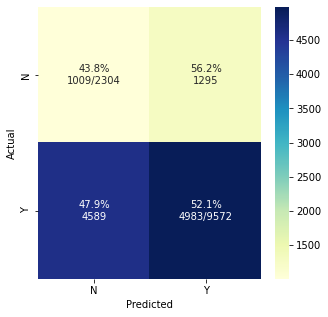

In [ ]:
classi_report(Euclidean)
plot_cm(y_test, Euclidean)

F1-score shows an accuracy of 0.50. 

                 Confusion Matrix                 

      N     Y
N  1010  1294
Y  4564  5008




              precision    recall  f1-score   support

           N       0.18      0.44      0.26      2304
           Y       0.79      0.52      0.63      9572

    accuracy                           0.51     11876
   macro avg       0.49      0.48      0.44     11876
weighted avg       0.68      0.51      0.56     11876



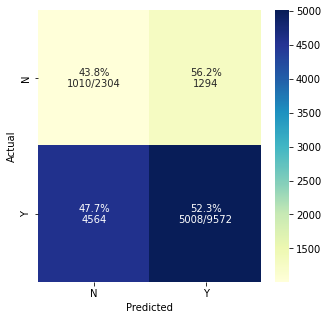

In [ ]:
classi_report(Manhattan)
plot_cm(y_test, Manhattan)

F1-score shows an accuracy of 0.51

### Confusion Matrix for Decision Tree

                 Confusion Matrix                 

   N     Y
N  0  2304
Y  0  9572






/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           N       0.00      0.00      0.00      2304
           Y       0.81      1.00      0.89      9572

    accuracy                           0.81     11876
   macro avg       0.40      0.50      0.45     11876
weighted avg       0.65      0.81      0.72     11876



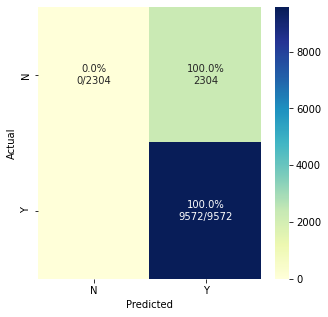

In [ ]:
classi_report(rfc_Count)
plot_cm(y_test, rfc_Count)

This means that there is no F-score to calculate for this label, and thus the F-score for this case is considered to be 0.0.

When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, rfc_Count, average=None, zero_division=1)

array([1.        , 0.80599528])

### Confusion Matrix for Logistic Regression

                 Confusion Matrix                 

   N     Y
N  0  2304
Y  2  9570




              precision    recall  f1-score   support

           N       0.00      0.00      0.00      2304
           Y       0.81      1.00      0.89      9572

    accuracy                           0.81     11876
   macro avg       0.40      0.50      0.45     11876
weighted avg       0.65      0.81      0.72     11876



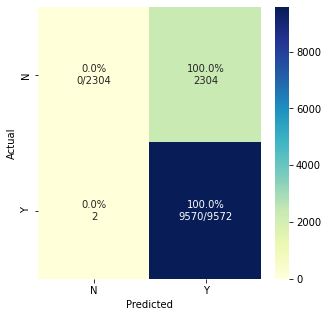

In [ ]:
classi_report(logr_y_pred)
plot_cm(y_test, logr_y_pred)

This means that there is no F-score to calculate for this label, and thus the F-score for this case is considered to be 0.0.

In [ ]:
precision_score(y_test, logr_y_pred, average=None, zero_division=1)

array([0.        , 0.80596261])

### Confusion Matrix for SVM

                 Confusion Matrix                 

   N     Y
N  0  2304
Y  0  9572






/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           N       0.00      0.00      0.00      2304
           Y       0.81      1.00      0.89      9572

    accuracy                           0.81     11876
   macro avg       0.40      0.50      0.45     11876
weighted avg       0.65      0.81      0.72     11876



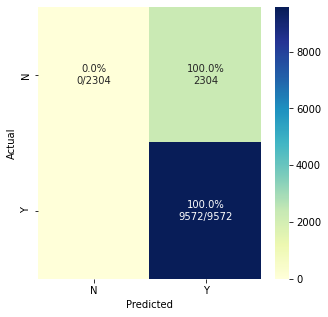

In [ ]:
classi_report(svm_Count)
plot_cm(y_test, svm_Count)

This means that there is no F-score to calculate for this label, and thus the F-score for this case is considered to be 0.0.

In [ ]:
precision_score(y_test, svm_Count, average=None, zero_division=1)

array([1.        , 0.80599528])